# An analysis of the State of the Union speeches - Part 5

In this notebook, you should explore one question or idea of your own from this dataset.  Provide the code and computations here, and summarize your points in the [main](main.ipynb) notebook.

In this analysis we use NLTK sentiment analysis to explore the positivity and negativity of words used in presidential speeches over time, by president, over time by party, and over time during select wartimes (Civil War, WWI, WWII, and Vietnam War).

Start by importing necessary libraries, as usual:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
import shelve

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

Including NLTK library for sentiment analysis:

In [16]:
from nltk.corpus import opinion_lexicon

Grab data from earlier notebooks for use in this analysis:

In [136]:
with shelve.open('results/vars2') as db:
    speech_words = db['speech_words']
    speeches_cleaned = db['speeches_cleaned']

addresses = pd.read_hdf('results/df2.h5', 'addresses')
addresses.head()

,president,title,date,n_sent,n_words_all,n_words,n_uwords,n_swords,n_chars
0,George Washington,State of the Union Address,1790-01-08,24,1178,538,395,356,6753
1,George Washington,State of the Union Address,1790-12-08,40,1515,683,513,463,8455
2,George Washington,State of the Union Address,1791-10-25,60,2487,1136,731,626,14203
3,George Washington,State of the Union Address,1792-11-06,61,2298,1042,682,580,12764
4,George Washington,State of the Union Address,1793-12-03,56,2132,972,714,652,11696


Get unique words from speeches_cleaned rather than unique_words since we do not want stemming:

In [138]:
flat_speeches_cleaned = [item for sublist in speeches_cleaned for item in sublist]
uspeeches = list(set(flat_speeches_cleaned))

Re-use word_vector function for matrix creation:

In [139]:
### From Notebook 3

def word_vector(doc, vocab):
    """Return a word vector for the input document in the context of a given vocabulary.
    
    Parameters
    ----------
    
    doc: iterable of words
       
    vocab : iterable of words
    integer, size of the entire vocabulary across documents.
    
    Return
    ------
    array
        An integer array, of length equal to `len(vocab)`, containing the count for each
        word in `doc` at its corresponding position in `vocab`.
        
    Example
    -------
    
    >>> doc = "b c b c e".split()
    ... vocab = "a b c d e f".split()
    ... word_vector(doc, vocab)
    ... 
    array([0, 2, 2, 0, 1, 0])
    """
    
    freqs = []
    for word in vocab:
        freqs.append(doc.count(word))

    return freqs

Make wmat matrix as in Notebook 3 but with our new word list, as well as matrices for positive and negative words:

In [14]:
### wmat -- Modified from Notebook 3

# creating first column of the word frequency matrix
wmat = pd.DataFrame(word_vector(list(speech_words[0]), uspeeches), uspeeches)


# setting counter for the column we add in each iteration
counter = 1

# looping over each speech to add the vector of word frequencies to the frequency matrix
for speech in speech_words[1:]:
    wmat[counter] = pd.DataFrame(word_vector(list(speech_words[counter]), uspeeches), uspeeches)
    counter = counter + 1

wmat[500:510]

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
counteraction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"3,100",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
officials,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"16,684,253",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
americanization,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hunted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
self-distrust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
antimonopoly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
line,0,0,0,0,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
flaxseed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
### pmat -- Modified from Notebook 3

pos = opinion_lexicon.positive()

# creating first column of the word frequency matrix
pmat = pd.DataFrame(word_vector(list(speech_words[0]), pos), pos)


# setting counter for the column we add in each iteration
counter = 1
# looping over each speech to add the vector of word frequencies to the frequency matrix
for speech in speech_words[1:]:
    pmat[counter] = pd.DataFrame(word_vector(list(speech_words[counter]), pos), pos)
    counter = counter + 1

pmat[500:510]

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
effusively,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
effusiveness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elatedly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
electrify,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elegance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elegant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
### nmat -- Modified from Notebook 3

neg = opinion_lexicon.negative()

# creating first column of the word frequency matrix
nmat = pd.DataFrame(word_vector(list(speech_words[0]), neg), neg)


# setting counter for the column we add in each iteration
counter = 1
# looping over each speech to add the vector of word frequencies to the frequency matrix
for speech in speech_words[1:]:
    nmat[counter] = pd.DataFrame(word_vector(list(speech_words[counter]), neg), neg)
    counter = counter + 1

nmat[500:510]

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
cackle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calamities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calamitous,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calamitously,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calamity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
callous,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calumniate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calumniation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calumnies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calumnious,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Add party affiliation for each president/speech:

In [140]:
# From http://www.enchantedlearning.com/history/us/pres/list.shtml
parties = {'  George Washington' : 'Unaffiliated',
           '  John Adams' : 'Federalist',
           '  Thomas Jefferson' : 'Democratic-Republican',
           '  James Madison' : 'Democratic-Republican',
           '  James Monroe' : 'Democratic-Republican',
           '  John Quincy Adams' : 'Democratic-Republican',
           '  Andrew Jackson' : 'Democrat',
           '  Martin van Buren' : 'Democrat',
           '  John Tyler' : 'Whig',
           '  James Polk' : 'Democrat',
           '  Zachary Taylor' : 'Whig',
           '  Millard Fillmore' : 'Whig',
           '  Franklin Pierce' : 'Democrat',
           '  James Buchanan' : 'Democrat',
           '  Abraham Lincoln' : 'Republican',
           '  Andrew Johnson' : 'National Union',
           '  Ulysses S. Grant' : 'Republican',
           '  Rutherford B. Hayes' : 'Republican',
           '  Chester A. Arthur' : 'Republican',
           '  Grover Cleveland' : 'Democrat',
           '  Benjamin Harrison' : 'Republican',
           '  William McKinley' : 'Republican',
           '  Theodore Roosevelt' : 'Republican',
           '  William H. Taft' : 'Republican',
           '  Woodrow Wilson' : 'Democrat',
           '  Warren Harding' : 'Republican',
           '  Calvin Coolidge' : 'Republican',
           '  Herbert Hoover' : 'Republican',
           '  Franklin D. Roosevelt' : 'Democrat',
           '  Harry S. Truman' : 'Democrat',
           '  Dwight D. Eisenhower' : 'Republican',
           '  John F. Kennedy' : 'Democrat',
           '  Lyndon B. Johnson' : 'Democrat',
           '  Richard Nixon' : 'Republican',
           '  Gerald R. Ford' : 'Republican',
           '  Jimmy Carter' : 'Democrat',
           '  Ronald Reagan' : 'Republican',
           '  George H.W. Bush' : 'Republican',
           '  William J. Clinton' : 'Democrat',
           '  George W. Bush' : 'Republican',
           '  Barack Obama' : 'Democrat',
           '  Donald J. Trump' : 'Republican'}
speech_parties = []
for index, row in addresses.iterrows():
    speech_parties.append(parties[row['president']])

Create sentiment proportion dataframe:

In [145]:
sent_prop_df = pd.DataFrame()
sent_prop_df["president"] = addresses["president"]
sent_prop_df["party"] = speech_parties
sent_prop_df["date"] = addresses["date"]
sent_prop_df["positive"] = pmat.sum(axis=0)/wmat.sum(axis=0)
sent_prop_df["negative"] = nmat.sum(axis=0)/wmat.sum(axis=0)
sent_prop_df["pos/neg"]  = sent_prop_df["positive"]/sent_prop_df["negative"]
sent_prop_df.head()

,president,party,date,positive,negative,pos/neg
0,George Washington,Unaffiliated,1790-01-08,0.15,0.05,3.10
1,George Washington,Unaffiliated,1790-12-08,0.12,0.07,1.65
2,George Washington,Unaffiliated,1791-10-25,0.11,0.08,1.44
3,George Washington,Unaffiliated,1792-11-06,0.09,0.07,1.30
4,George Washington,Unaffiliated,1793-12-03,0.10,0.08,1.19


## Plot sentiment distributions over time

In [154]:
pd.options.display.precision = 2
dists = sent_prop_df.describe()
dists

,positive,negative,pos/neg
count,227.00,227.00,227.00
mean,0.08,0.08,1.06
std,0.01,0.02,0.34
min,0.04,0.03,0.53
25%,0.07,0.07,0.85
50%,0.07,0.07,1.02
75%,0.08,0.09,1.17
max,0.15,0.13,3.38


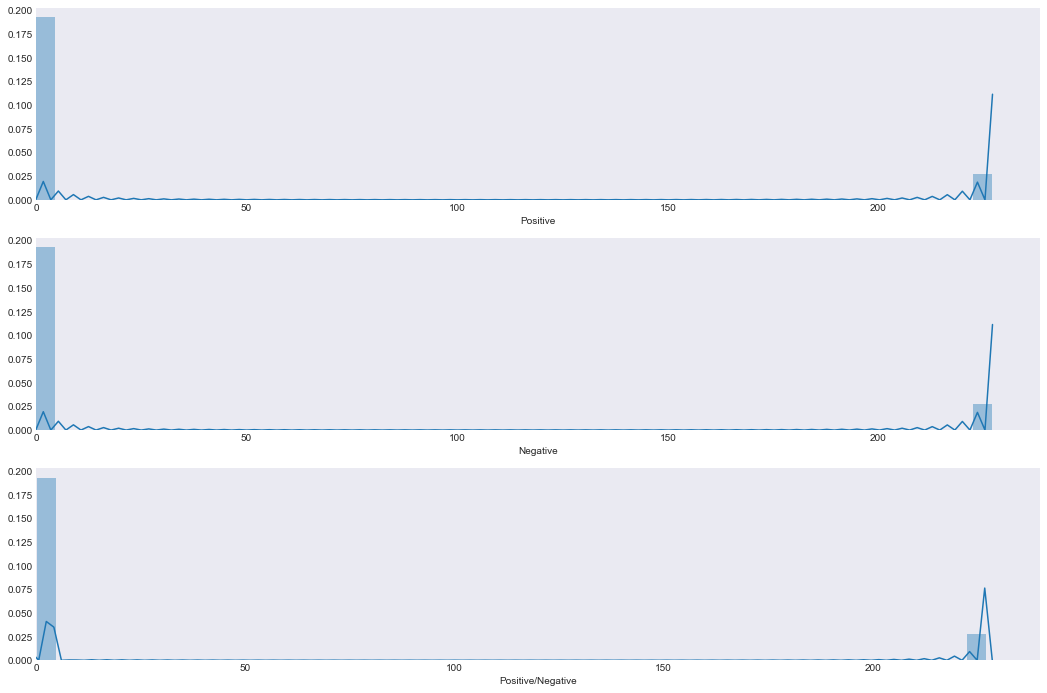

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 12), nrows =3 , ncols = 1)
sns.distplot(dists['positive'], ax = ax1);
ax1.set_xlabel('Positive')
ax1.set_xlim(0, )

sns.distplot(dists['negative'], ax = ax2);
ax2.set_xlabel('Negative')
ax2.set_xlim(0, )

sns.distplot((dists['pos/neg']), ax = ax3);
ax3.set_xlabel('Positive/Negative')
ax3.set_xlim(0, )

#Save our plots as pngs in the fig directory
plt.savefig("fig/sent_dists.png")

## Plot sentiment proportions over time

In [157]:
positives = pd.Series(list(sent_prop_df.positive), index = sent_prop_df.date)
negatives = pd.Series(list(sent_prop_df.negative), index = sent_prop_df.date)
pos_negs = pd.Series(list(sent_prop_df['pos/neg']), index = sent_prop_df.date)

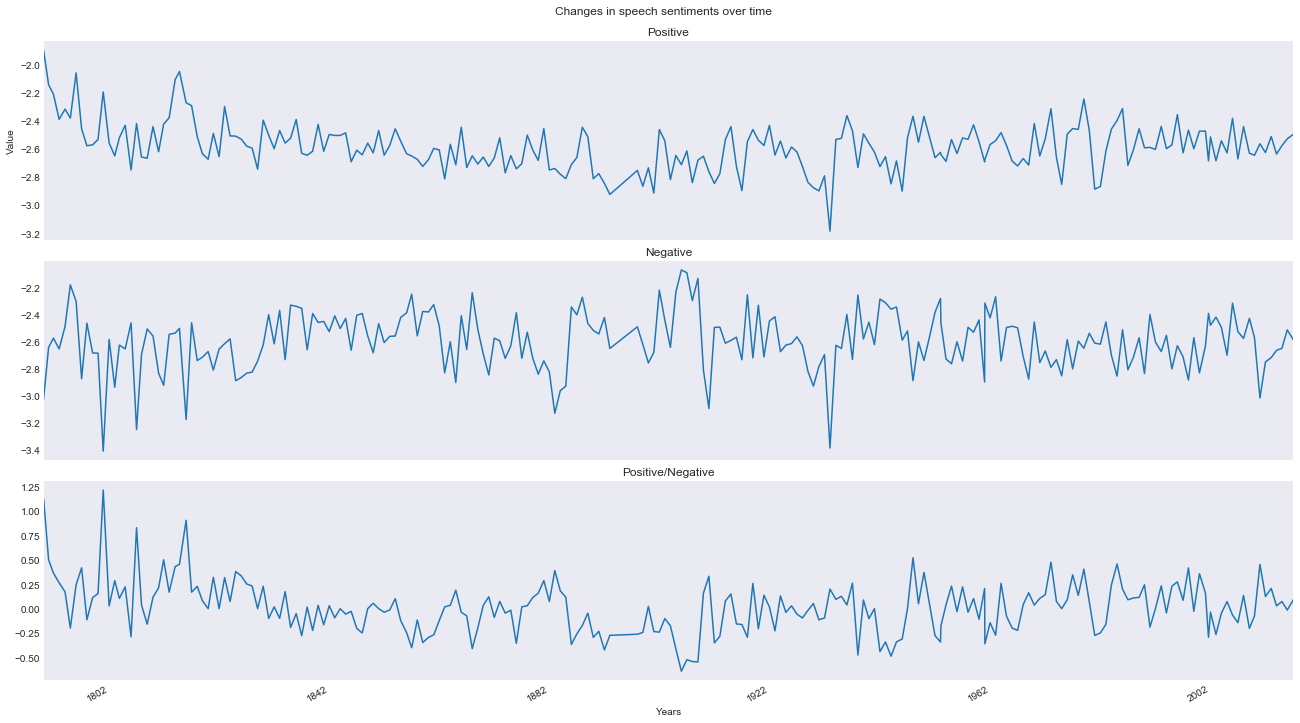

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time')

#Plot the proportion of positive words over time
np.log(positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words over time
np.log(negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words over time
np.log(pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/sent_time.png")

## Plot sentiment proportions over president

In [163]:
pres_positives = pd.Series(list(sent_prop_df.positive), index = sent_prop_df.president)
pres_negatives = pd.Series(list(sent_prop_df.negative), index = sent_prop_df.president)
pres_pos_negs = pd.Series(list(sent_prop_df['pos/neg']), index = sent_prop_df.president)

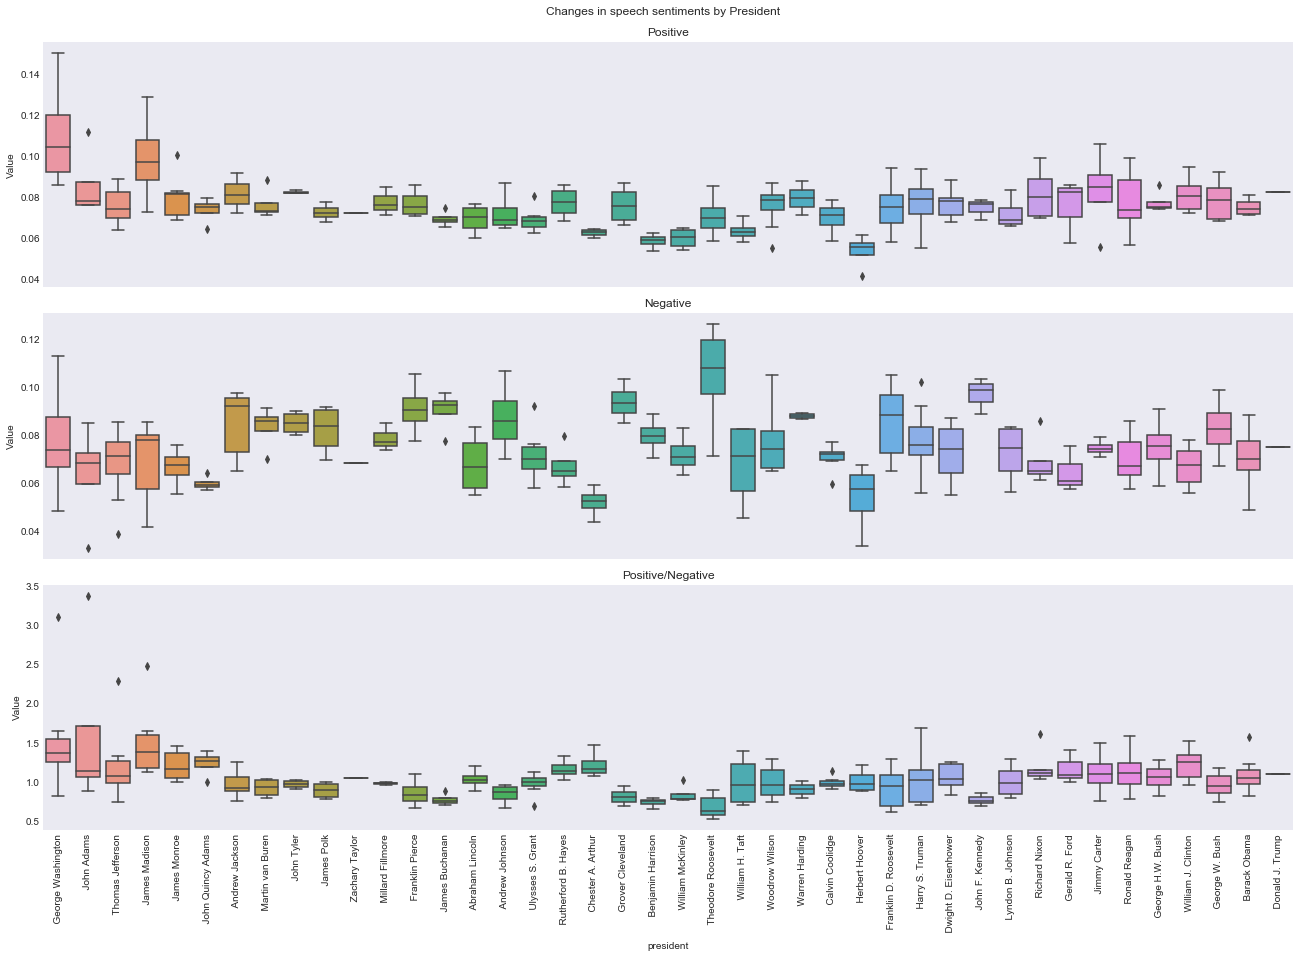

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments by President')

#Plot the proportion of positive words by president
sns.boxplot(y=pres_positives, x=pres_positives.index, ax = ax1);
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')
ax1.set_title('Positive')
#ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

#Plot the proportion of negative words by president
sns.boxplot(y=pres_negatives, x=pres_negatives.index, ax = ax2);
ax2.xaxis.set_visible(False)
ax2.set_ylabel('Value')
ax2.set_title('Negative')
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

#Plot the ratio of positive/negative words by president
sns.boxplot(y=pres_pos_negs, x=pres_pos_negs.index, ax = ax3);
#ax2.xaxis.set_visible(False)
ax3.set_ylabel('Value')
ax3.set_title('Positive/Negative')
ax3.set_xticklabels(ax2.get_xticklabels(), rotation=90)

#Save our plots as pngs in the fig directory
plt.savefig("fig/sent_pres.png")

## Plot sentiment over time for each party affiliation

In [167]:
sent_by_party = sent_prop_df.groupby('party')
sent_by_party.get_group('Democrat')
set(parties.values())

unaffiliated = sent_by_party.get_group('Unaffiliated')
federalist = sent_by_party.get_group('Federalist')
democratic_repub = sent_by_party.get_group('Democratic-Republican')
democrat = sent_by_party.get_group('Democrat')
whig = sent_by_party.get_group('Whig')
republican = sent_by_party.get_group('Republican')
national_union = sent_by_party.get_group('National Union')

In [171]:
# Create series for each plot
unaffiliated_positives = pd.Series(list(unaffiliated.positive), index = unaffiliated.date)
unaffiliated_negatives = pd.Series(list(unaffiliated.negative), index = unaffiliated.date)
unaffiliated_pos_negs = pd.Series(list(unaffiliated['pos/neg']), index = unaffiliated.date)

federalist_positives = pd.Series(list(federalist.positive), index = federalist.date)
federalist_negatives = pd.Series(list(federalist.negative), index = federalist.date)
federalist_pos_negs = pd.Series(list(federalist['pos/neg']), index = federalist.date)

democrat_repub_positives = pd.Series(list(democratic_repub.positive), index = democratic_repub.date)
democrat_repub_negatives = pd.Series(list(democratic_repub.negative), index = democratic_repub.date)
democrat_repub_pos_negs = pd.Series(list(democratic_repub['pos/neg']), index = democratic_repub.date)

democrat_positives = pd.Series(list(democrat.positive), index = democrat.date)
democrat_negatives = pd.Series(list(democrat.negative), index = democrat.date)
democrat_pos_negs = pd.Series(list(democrat['pos/neg']), index = democrat.date)

whig_positives = pd.Series(list(whig.positive), index = whig.date)
whig_negatives = pd.Series(list(whig.negative), index = whig.date)
whig_pos_negs = pd.Series(list(whig['pos/neg']), index = whig.date)

republican_positives = pd.Series(list(republican.positive), index = republican.date)
republican_negatives = pd.Series(list(republican.negative), index = republican.date)
republican_pos_negs = pd.Series(list(republican['pos/neg']), index = republican.date)

nat_union_positives = pd.Series(list(national_union.positive), index = national_union.date)
nat_union_negatives = pd.Series(list(national_union.negative), index = national_union.date)
nat_union_pos_negs = pd.Series(list(national_union['pos/neg']), index = national_union.date)

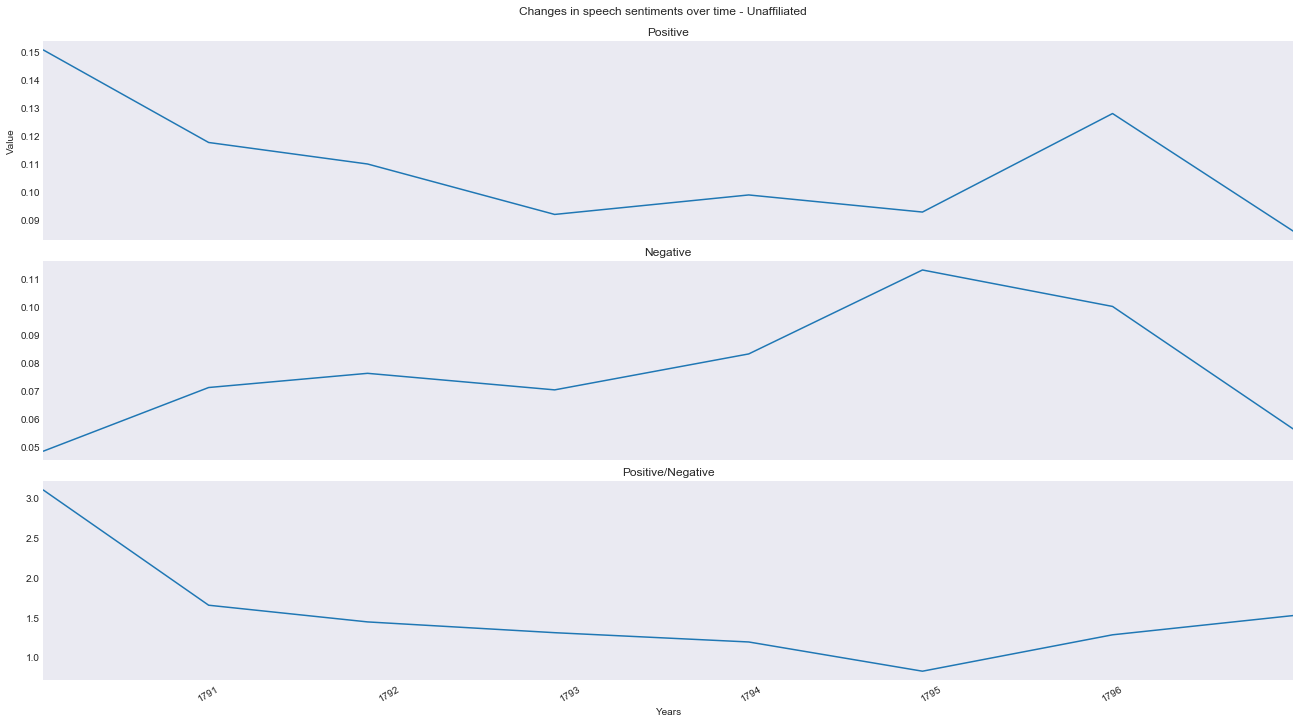

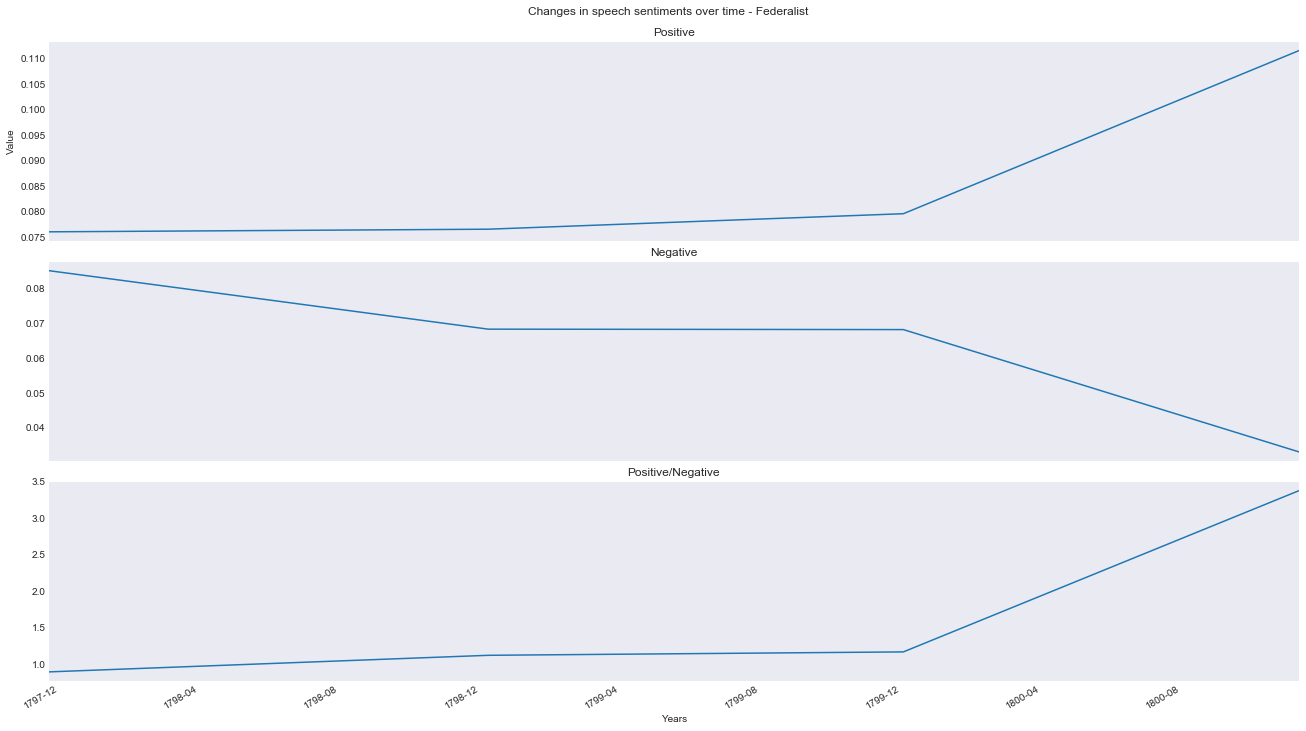

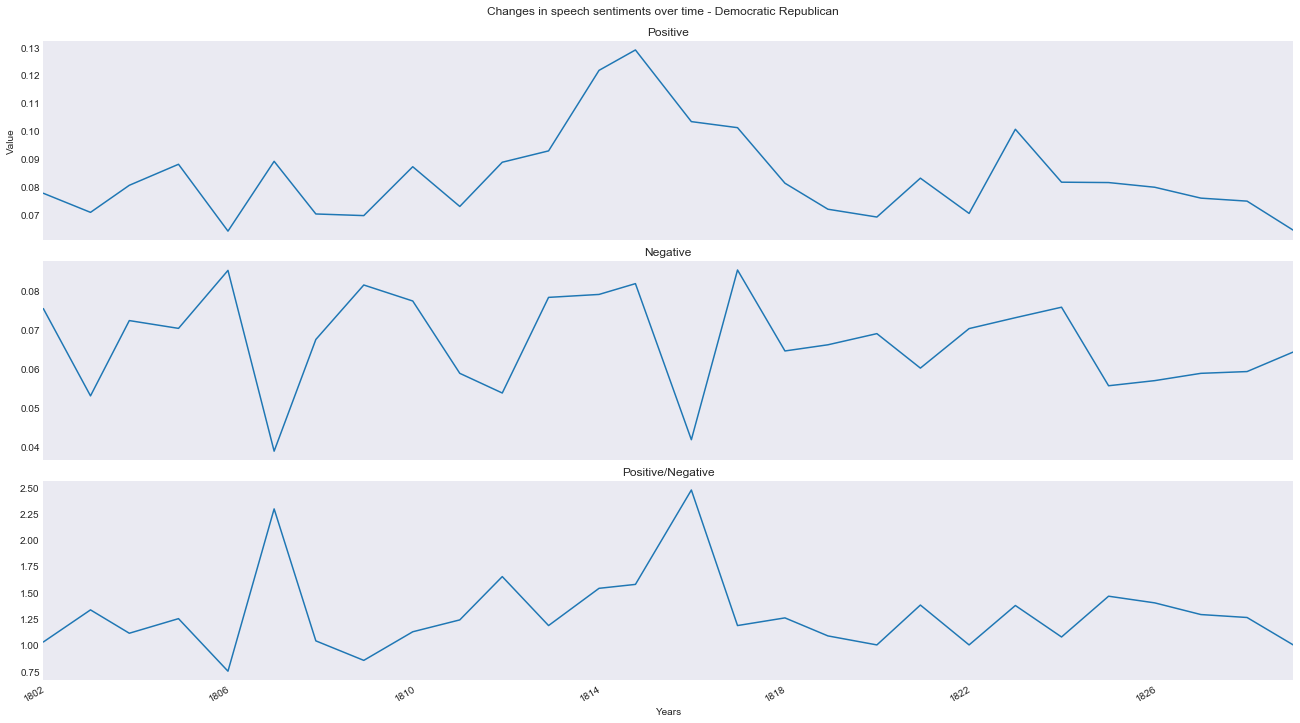

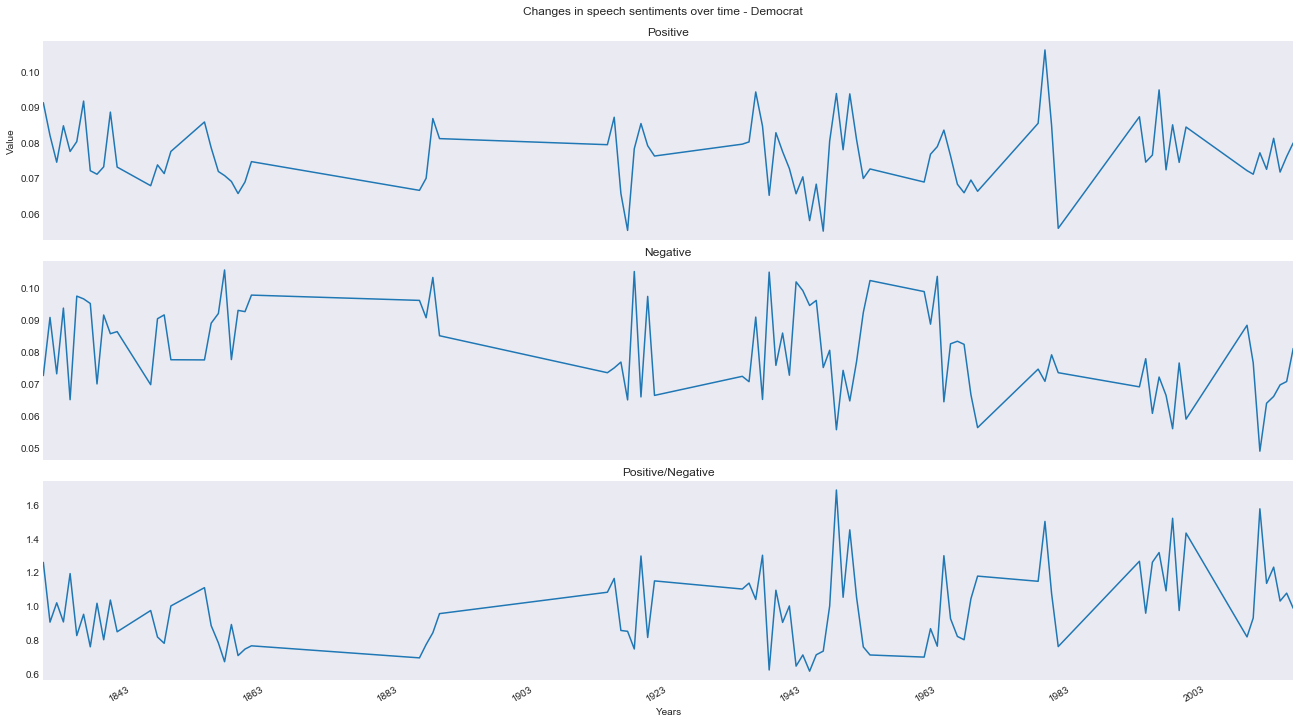

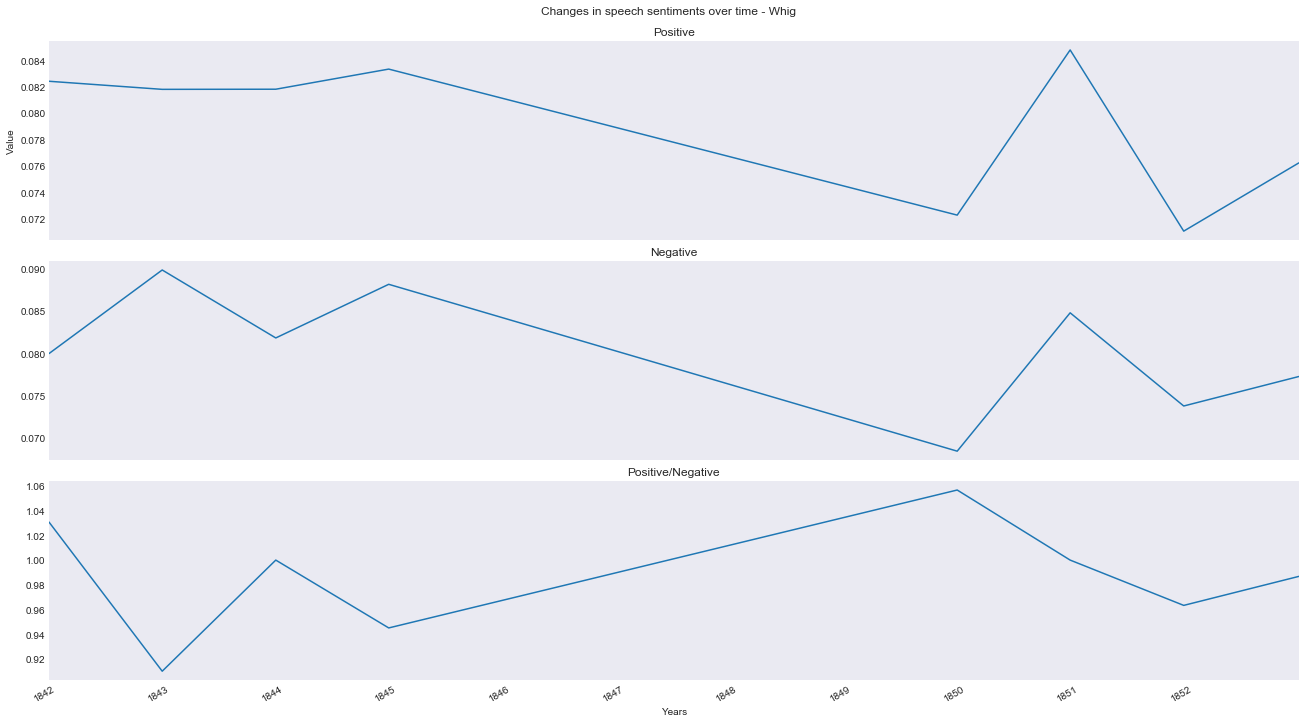

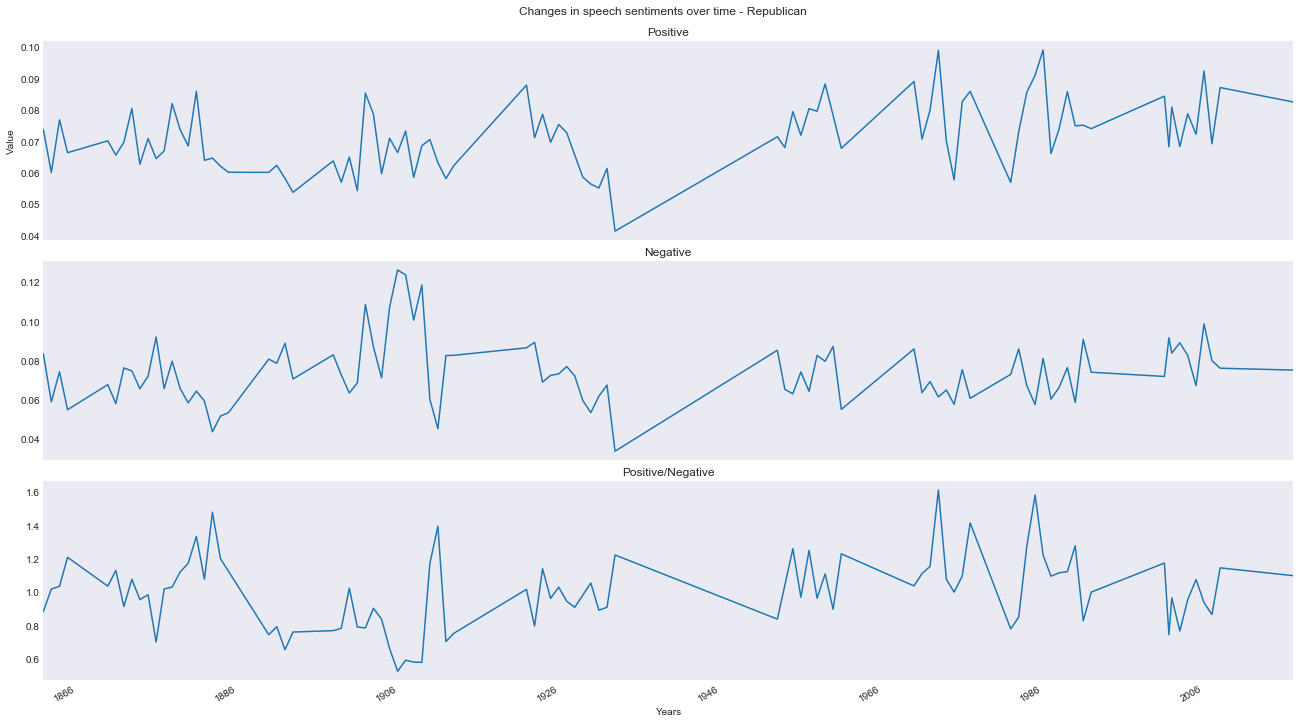

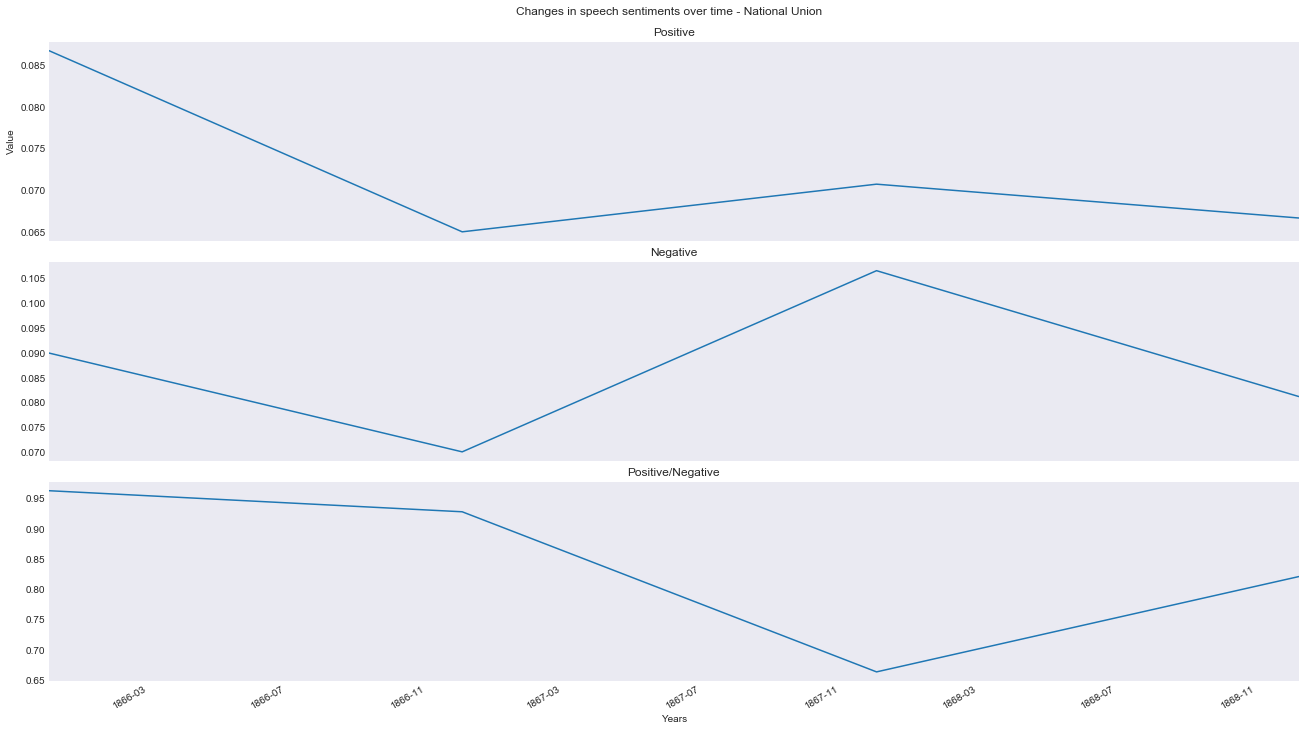

In [174]:
## Unaffiliated ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Unaffiliated')

#Plot the proportion of positive words
(unaffiliated_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(unaffiliated_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(unaffiliated_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/unaffiliated.png")

## Federalist ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Federalist')

#Plot the proportion of positive words
(federalist_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(federalist_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(federalist_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/federalist.png")

## Democratic Republican ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Democratic Republican')

#Plot the proportion of positive words
(democrat_repub_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(democrat_repub_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(democrat_repub_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/democrat_repub.png")

## Democrat ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Democrat')

#Plot the proportion of positive words
(democrat_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(democrat_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(democrat_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/democrat.png")

## Whig ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Whig')

#Plot the proportion of positive words
(whig_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(whig_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(whig_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/whig.png")

## Republican ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Republican')

#Plot the proportion of positive words
(republican_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(republican_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(republican_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/republican.png")

## National Union ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - National Union')

#Plot the proportion of positive words
(nat_union_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(nat_union_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(nat_union_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/nat_union.png")

## Plot sentiment over time during war

Create dictionary of presidents for each war to be examined. Note that we include all speeches during the full presidencies of all presidents who presided over the specified war for any amount of time, even if only for a few months, which is commonly case due to death of resignation of the previous president. Our intent is to see if there is any discernible change in a president's sentiment over before/during/after wartime.

Start and end dates of wars were gleaned from Wikipedia.

In [177]:
war_presidents = {"Civil War": ['  Abraham Lincoln', '  Andrew Johnson'],
                  "World War I": ['  Woodrow Wilson'],
                  "World War II": ['  Franklin D. Roosevelt', '  Harry S. Truman'],
                  "Vietnam War": ['  Dwight D. Eisenhower', '  John F. Kennedy',
       '  Lyndon B. Johnson', '  Richard Nixon', '  Gerald R. Ford']
                 }

In [181]:
civil_war = sent_prop_df.loc[sent_prop_df['president'].isin(war_presidents["Civil War"])]
wwi = sent_prop_df.loc[sent_prop_df['president'].isin(war_presidents["World War I"])]
wwii = sent_prop_df.loc[sent_prop_df['president'].isin(war_presidents["World War II"])]
vietnam_war = sent_prop_df.loc[sent_prop_df['president'].isin(war_presidents["Vietnam War"])]

In [191]:
# Create series for each plot
civil_war_positives = pd.Series(list(civil_war.positive), index = civil_war.president)
civil_war_negatives = pd.Series(list(civil_war.negative), index = civil_war.president)
civil_war_pos_negs = pd.Series(list(civil_war['pos/neg']), index = civil_war.president)

wwi_positives = pd.Series(list(wwi.positive), index = wwi.president)
wwi_negatives = pd.Series(list(wwi.negative), index = wwi.president)
wwi_pos_negs = pd.Series(list(wwi['pos/neg']), index = wwi.president)

wwii_positives = pd.Series(list(wwii.positive), index = wwii.president)
wwii_negatives = pd.Series(list(wwii.negative), index = wwii.president)
wwii_pos_negs = pd.Series(list(wwii['pos/neg']), index = wwii.president)

vietnam_war_positives = pd.Series(list(vietnam_war.positive), index = vietnam_war.president)
vietnam_war_negatives = pd.Series(list(vietnam_war.negative), index = vietnam_war.president)
vietnam_war_pos_negs = pd.Series(list(vietnam_war['pos/neg']), index = vietnam_war.president)

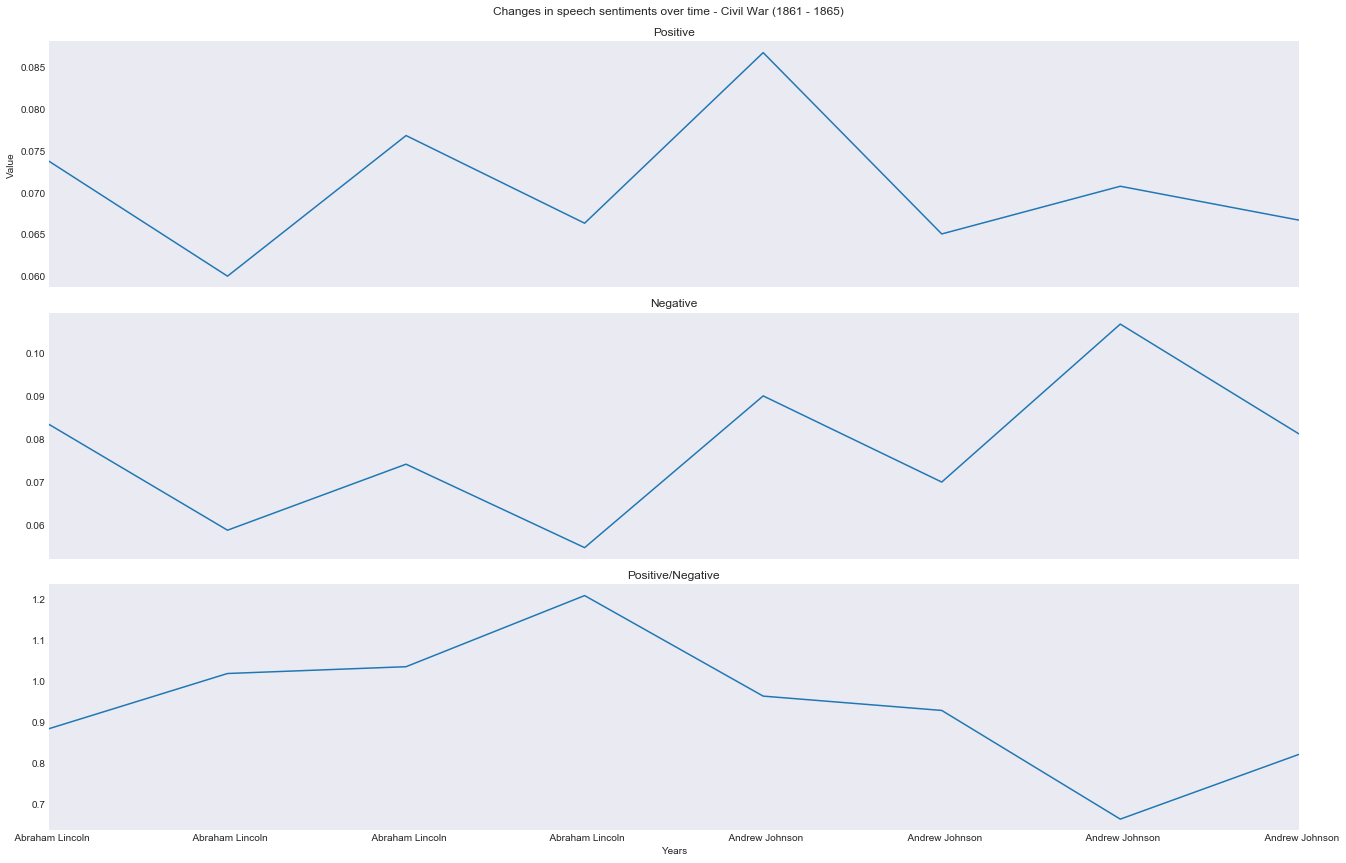

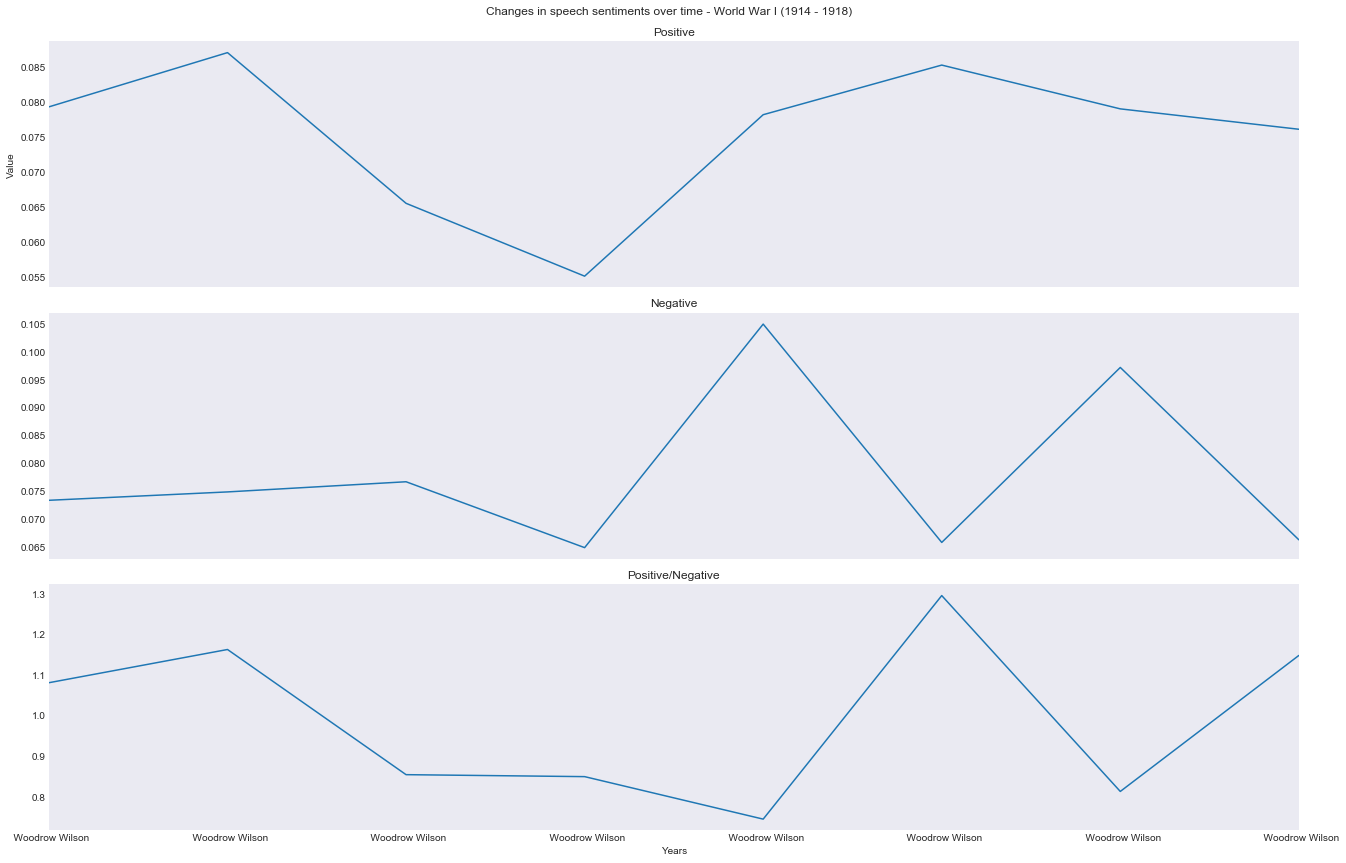

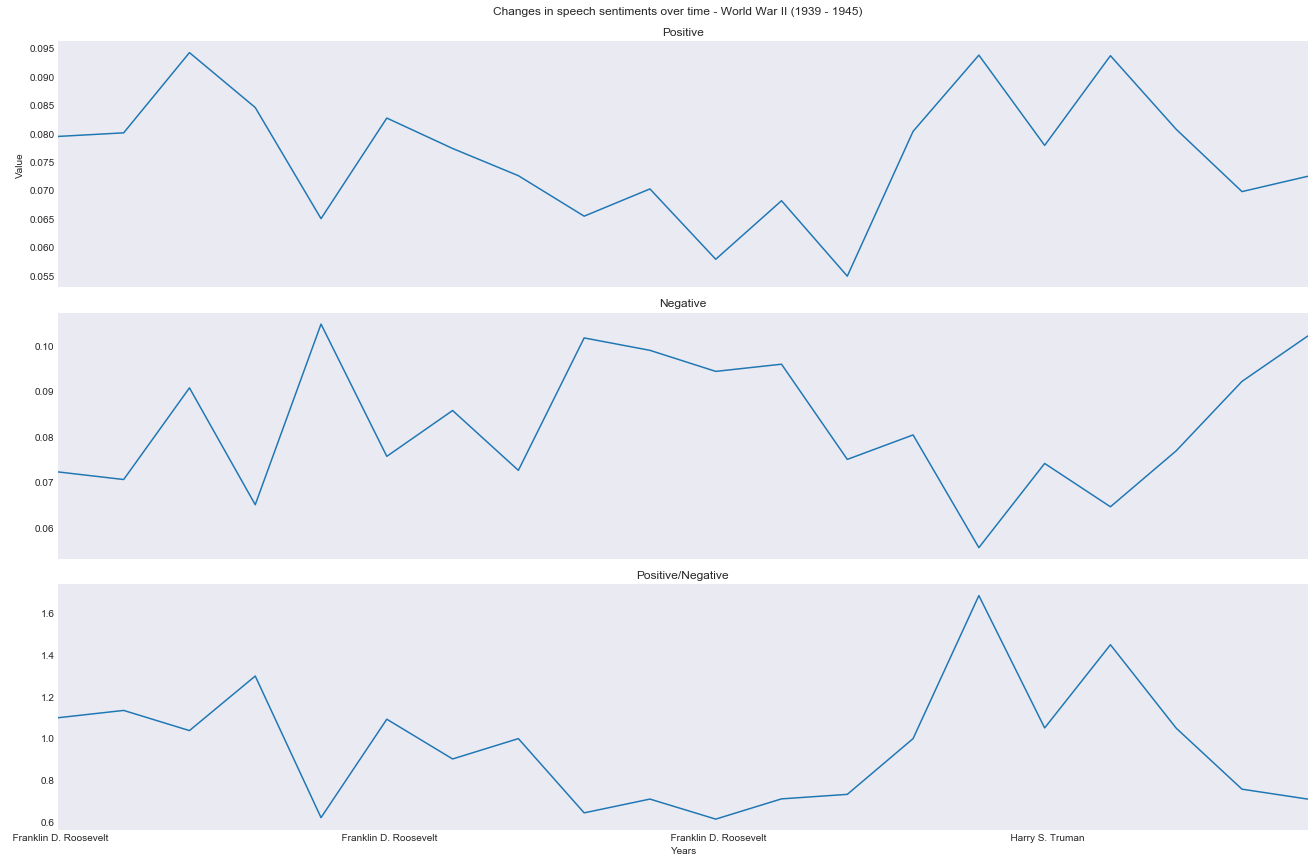

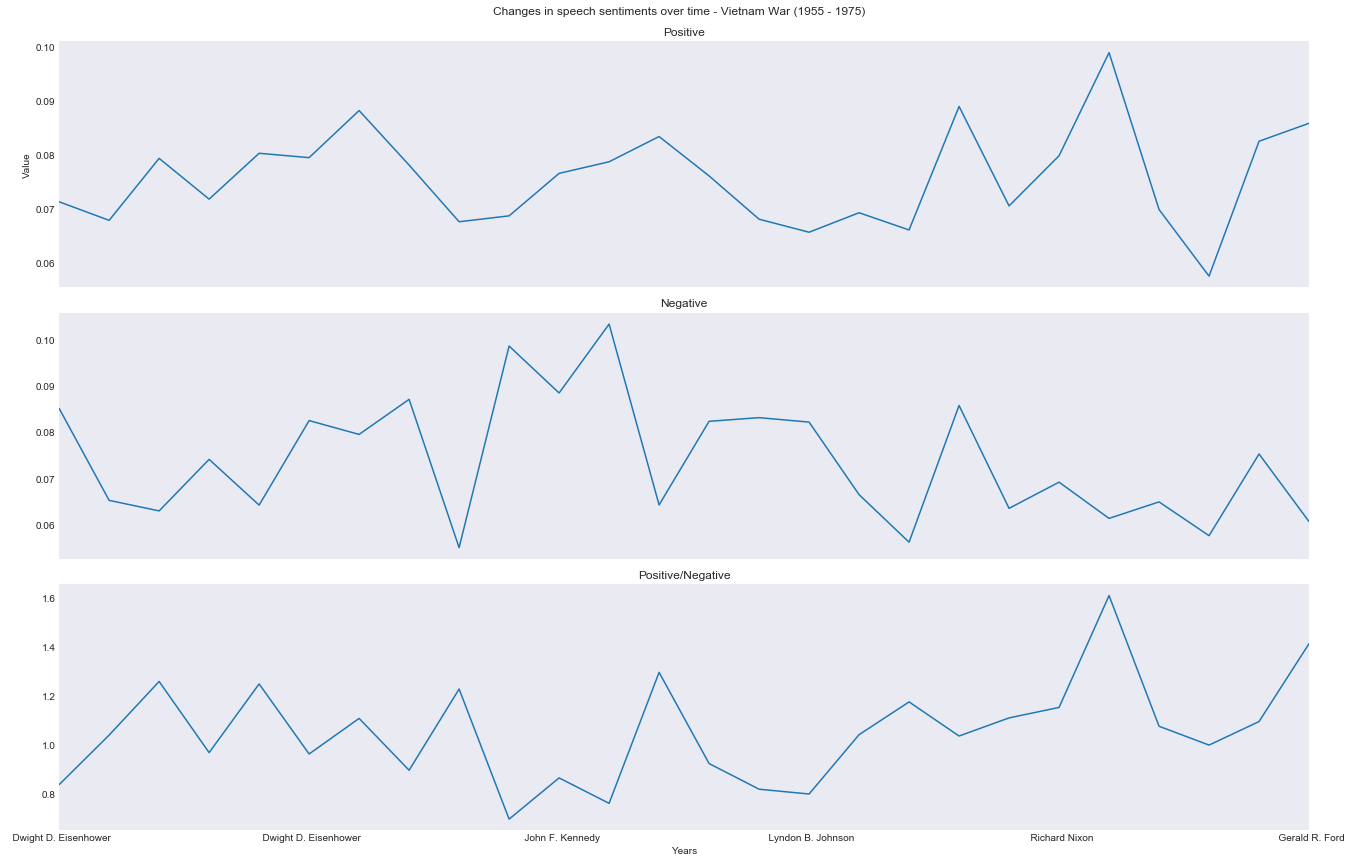

In [193]:
## Civil War ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Civil War (1861 - 1865)')

#Plot the proportion of positive words
(civil_war_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(civil_war_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(civil_war_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/civil_war.png")


## World War I ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - World War I (1914 - 1918)')

#Plot the proportion of positive words
(wwi_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(wwi_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(wwi_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/wwi.png")


## World War II ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - World War II (1939 - 1945)')

#Plot the proportion of positive words
(wwii_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(wwii_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(wwii_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/wwii.png")


## Vietnam War ##
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 12), nrows = 3, ncols = 1)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Changes in speech sentiments over time - Vietnam War (1955 - 1975)')

#Plot the proportion of positive words
(vietnam_war_positives).plot(ax = ax1)
ax1.set_title('Positive')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('Value')

#Plot the proportion of negative words
(vietnam_war_negatives).plot(ax = ax2)
ax2.set_title('Negative')
ax1.set_ylabel('Value')
ax2.xaxis.set_visible(False)
ax2.set_xlabel('Years')

#Plot the ratio of positive/negative words
(vietnam_war_pos_negs).plot(ax = ax3)
ax3.set_title('Positive/Negative')
ax1.set_ylabel('Value')
#ax2.xaxis.set_visible(False)
ax3.set_xlabel('Years')

#Save our plots as pngs in the fig directory
plt.savefig("fig/vietnam_war.png")